In [3]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [4]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=key, 
    model_name='gpt-4o-mini',
    temperature=0.1
)

In [7]:
def chatbot(state: State):
    answer = llm.invoke(state['messages'])

    print('===================' * 20)
    print('1.chatbot() 실행')
    print(f"2.state[messages]: {state['messages']}")
    print('3.chatbot answer:', answer)
    print('4.chatbot answer:', answer.content)
    print('===================' * 20)

    return {'messages': [answer]}

In [8]:
graph_builder = StateGraph(State)

In [9]:
graph_builder.add_node('chatbot', chatbot)      # 노드(함수) 이름을 인자로 받아서 chatbot 노드를 추가

In [10]:
graph_builder.add_edge(START, 'chatbot')        # 시작 노드에서 챗봇 노드(chatbot)로의 엣지 추가

In [11]:
graph_builder.add_edge('chatbot', END)          # chatbot 노드에서 END 노드로 엣지 추가

In [12]:
graph = graph_builder.compile()                 # 그래프 컴파일

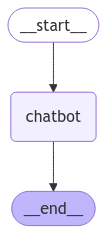

In [13]:
from IPython.display import Image, display      # 그래프 시각화

display(Image(graph.get_graph().draw_mermaid_png()))

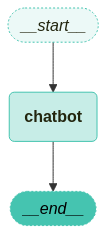

In [14]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [15]:
question = '대구 동성로 떡볶에에 대해서 알려줘'

In [16]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')
    print(event)
    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대구 동성로 떡볶에에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='3add004e-6a5e-477a-8bac-013b590d6609')]
3.chatbot answer: content='대구 동성로는 대구의 중심가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 떡볶이는 특히 인기 있는 길거리 음식 중 하나입니다. 대구의 떡볶이는 일반적으로 매콤하고 달콤한 맛이 특징이며, 다양한 재료와 함께 제공됩니다.\n\n동성로의 떡볶이 가게들은 각기 다른 특색을 가지고 있으며, 떡볶이 외에도 튀김, 오뎅, 순대 등 다양한 사이드 메뉴를 함께 즐길 수 있습니다. 특히, 대구의 떡볶이는 국물 떡볶이와 볶음 떡볶이 두 가지 스타일로 제공되는 경우가 많아 선택의 폭이 넓습니다.\n\n또한, 동성로는 젊은 층과 관광객들이 많이 찾는 곳이기 때문에, 떡볶이를 즐기며 거리의 분위기를 만끽할 수 있는 좋은 장소입니다. 대구를 방문한다면 동성로에서 떡볶이를 꼭 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 243, 'prompt_tokens': 21, 'total_tokens': 264, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'f

In [23]:
from langchain_core.messages import HumanMessage, AIMessage

humanMessage = HumanMessage(
    content='대구 동성로 떡볶이에 대해서 알려줘', 
    additional_kwargs={}, 
    response_metadata={}, 
    id='1')

state = State(messages=[humanMessage])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')

    print(f"(1) [content]: \n {event['chatbot']['messages'][-1].content}")
    print(f"(2) [additional_kwargs]: \n {event['chatbot']['messages'][-1].additional_kwargs}")
    print(f"(3) [response_metadata]: \n {event['chatbot']['messages'][-1].response_metadata}")
    print(f"(4) id: {event['chatbot']['messages'][-1].id}")
    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='1')]
3.chatbot answer: content='대구 동성로는 대구의 중심가로, 다양한 음식과 쇼핑을 즐길 수 있는 인기 있는 장소입니다. 그 중에서도 떡볶이는 많은 사람들이 찾는 대표적인 길거리 음식 중 하나입니다. \n\n동성로의 떡볶이는 일반적으로 매콤하고 달콤한 소스에 쫄깃한 떡과 다양한 재료가 어우러져 있습니다. 보통 어묵, 계란, 채소 등이 함께 제공되며, 각 가게마다 특색 있는 소스와 조리법으로 차별화를 두고 있습니다. \n\n특히, 대구의 떡볶이는 다른 지역과 비교했을 때 조금 더 매운 편이며, 고추장과 고춧가루를 적절히 섞어 깊은 맛을 내는 경우가 많습니다. 또한, 대구에서는 떡볶이와 함께 튀김이나 순대 같은 다른 길거리 음식도 함께 즐기는 것이 일반적입니다.\n\n동성로에는 떡볶이 전문점뿐만 아니라 다양한 음식점들이 밀집해 있어, 떡볶이를 먹으면서 다른 음식을 함께 즐길 수 있는 장점이 있습니다. 대구를 방문할 때는 동성로에서 떡볶이를 꼭 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 283, 'prompt_tokens': 20, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-

In [25]:
humanMessage = HumanMessage(
    content='대구 동성로 떡볶이에 대해서 알려줘', 
    additional_kwargs={}, 
    response_metadata={}, 
    id='2')

state = State(messages=[humanMessage])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')

    for k, value in event.items():
        print(f'실행된 노드 이름: {k}')
        print('===================' * 20)
        print(f"assistant 답변: ")
        print(f"{value['messages'][-1].content}")

    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='2')]
3.chatbot answer: content='대구 동성로는 대구의 대표적인 번화가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 특히 떡볶이는 이 지역에서 인기 있는 길거리 음식 중 하나로, 많은 사람들이 찾는 명소입니다.\n\n동성로의 떡볶이는 일반적으로 매콤하고 달콤한 소스에 쫄깃한 떡과 다양한 재료가 어우러져 맛을 냅니다. 떡볶이 외에도 튀김, 오뎅, 순대 등 다양한 사이드 메뉴를 함께 즐길 수 있는 곳이 많습니다. 특히, 대구의 떡볶이는 다른 지역과 비교했을 때 국물 떡볶이 스타일이 많아, 국물과 함께 먹는 것이 특징입니다.\n\n동성로에는 여러 유명한 떡볶이 가게들이 있으며, 각 가게마다 특색 있는 레시피와 맛을 자랑합니다. 많은 사람들이 이곳에서 떡볶이를 즐기며, 친구나 가족과 함께 소중한 시간을 보내곤 합니다. 대구를 방문한다면 동성로의 떡볶이를 꼭 한 번 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 262, 'prompt_tokens': 20, 'total_tokens': 282, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint':

In [29]:
question = '대구 동성로 떡볶이에 대해서 알려줘'

# state = State(messages=[('user', question)])

for event in graph.stream({'messages': [('user', question)]}):
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')        
        print(f"[assistant 답변]: \n{value['messages'][-1].content}")

    print('===== for  끝 =====')

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='e426ae17-7e8f-4d3b-a763-1c18c67df032')]
3.chatbot answer: content='대구 동성로는 대구의 중심가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 특히 유명한 음식 중 하나가 떡볶이입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스에 쫄깃한 떡과 다양한 재료가 어우러져 많은 사람들에게 사랑받고 있습니다.\n\n동성로에는 여러 떡볶이 전문점이 있으며, 각 가게마다 특색 있는 레시피와 재료를 사용하여 다양한 맛을 제공합니다. 일반적으로 떡볶이에는 어묵, 삶은 계란, 야채 등이 함께 들어가며, 일부 가게에서는 치즈, 튀김, 해물 등 다양한 토핑을 추가할 수 있습니다.\n\n또한, 동성로는 젊은 층과 관광객들이 많이 찾는 곳이라, 떡볶이를 즐기며 거리의 분위기를 만끽할 수 있는 좋은 장소입니다. 대구를 방문할 계획이 있다면 동성로의 떡볶이를 꼭 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 246, 'prompt_tokens': 20, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerpr